In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\hp\Downloads"

C:\Users\hp\Downloads


In [3]:
medicaredf=pd.read_csv("MUP_PHY_R23_P05_V10_D21_Geo.csv",low_memory=False)

In [4]:
medicaredf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271635 entries, 0 to 271634
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Rndrng_Prvdr_Geo_Lvl   271635 non-null  object 
 1   Rndrng_Prvdr_Geo_Cd    258353 non-null  object 
 2   Rndrng_Prvdr_Geo_Desc  271635 non-null  object 
 3   HCPCS_Cd               271635 non-null  object 
 4   HCPCS_Desc             271635 non-null  object 
 5   HCPCS_Drug_Ind         271635 non-null  object 
 6   Place_Of_Srvc          271635 non-null  object 
 7   Tot_Rndrng_Prvdrs      271635 non-null  int64  
 8   Tot_Benes              271635 non-null  int64  
 9   Tot_Srvcs              271635 non-null  float64
 10  Tot_Bene_Day_Srvcs     271635 non-null  int64  
 11  Avg_Sbmtd_Chrg         271635 non-null  float64
 12  Avg_Mdcr_Alowd_Amt     271635 non-null  float64
 13  Avg_Mdcr_Pymt_Amt      271635 non-null  float64
 14  Avg_Mdcr_Stdzd_Amt     271635 non-nu

In [5]:
# Drop  it is numeric Code for Rndrng_Prvdr_Geo_Desc
medicaredf=medicaredf.drop('Rndrng_Prvdr_Geo_Cd',axis=1)

In [6]:
# Pie Diagrams of Place_Of_Srvc, HCPCS_Drug_Ind,Rndrg_Prvdr_Geo_Lvl
# Clustered Column Chart Average Avg_Mdcr_Pymt of Place_Of_Srvc
# Clustered Column Chart Average Tot_Benes of Place_Of_Srvc
# Clustered Column Chart Average Tot_Srvcs ofPlace_Of_Srv
# Clustered Column Chart of Rndrg_Prvdr_Geo
# Clustered Column Chart of Rndrg_Prvdr_Geo wise Tot_Rndrg_Prvdrs
# Stacked Column Chart of Rndrg_Prvdr_Geo and Place_Of_Srvc
# Clustered Column Chart Average Avg_Mdcr_Pymt of Rndrg_Prvdr_Geo
# Clustered Column Chart Average Tot_Benes of Rndrg_Prvdr_Geo
# Descriptive Statistics – Count, Min, Max, Average, Median, Std Deviation,skew,kurt - Avg_Mdcr_Pymt
# Descriptive Statistics – Count, Min, Max, Average,Median, Std Deviation,skew,kurt – Tot_Srvcs

<Axes: ylabel='count'>

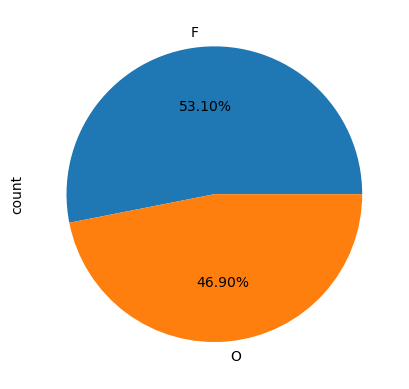

In [7]:
medicaredf.Place_Of_Srvc.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

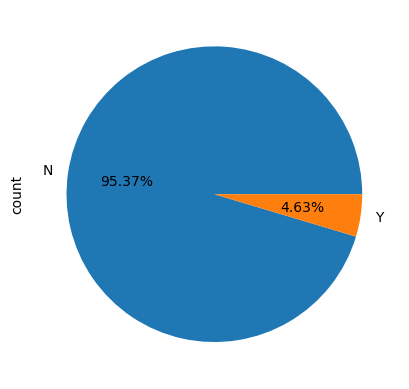

In [8]:
medicaredf.HCPCS_Drug_Ind.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

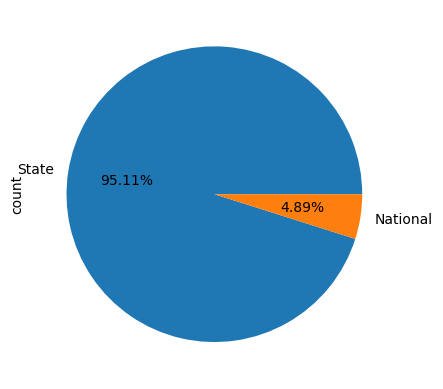

In [9]:
medicaredf.Rndrng_Prvdr_Geo_Lvl.value_counts().plot(kind="pie",autopct="%.2f%%")

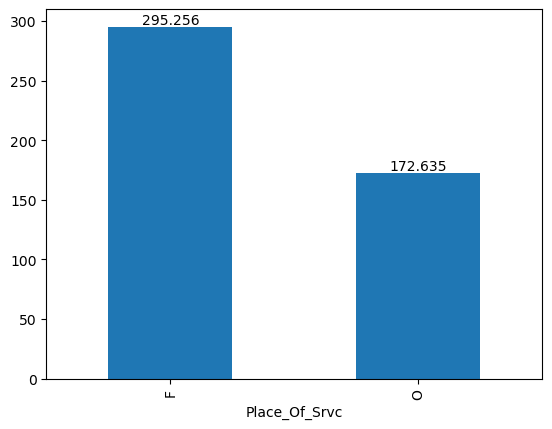

In [10]:
ax=medicaredf.Avg_Mdcr_Pymt_Amt.groupby(medicaredf.Place_Of_Srvc).mean().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Rndrng_Prvdr_Geo_Desc'>

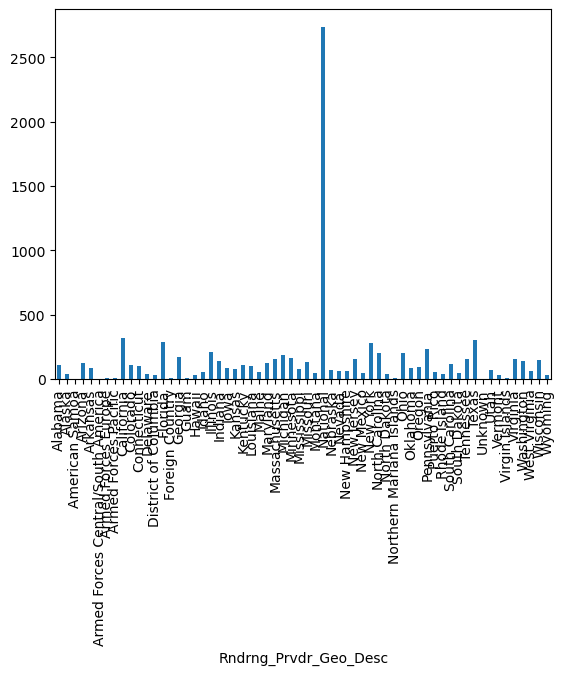

In [11]:
medicaredf.Tot_Rndrng_Prvdrs.groupby(
    medicaredf.Rndrng_Prvdr_Geo_Desc).mean().plot(kind="bar")

In [12]:
medicaredf.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Desc', 'HCPCS_Cd',
       'HCPCS_Desc', 'HCPCS_Drug_Ind', 'Place_Of_Srvc', 'Tot_Rndrng_Prvdrs',
       'Tot_Benes', 'Tot_Srvcs', 'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg',
       'Avg_Mdcr_Alowd_Amt', 'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt'],
      dtype='object')

In [13]:
medicaredf=medicaredf.drop(['HCPCS_Cd','HCPCS_Desc'],axis=1)

In [14]:
# Test Null Average Avg_Mdcr_Pymt_Amt for Place_Of_Srvc is equal
# Test Null Average Tot_Bene_Day_Srvcs for Place_Of_Srvc is equal

# Test Null No Association between Rndrng_Prvdr_Geo_Lvl and Place_Of_Srvc

In [15]:
medicaredf.Avg_Mdcr_Pymt_Amt.groupby(medicaredf.Place_Of_Srvc).mean()

Place_Of_Srvc
F    295.256312
O    172.634904
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [16]:
medicaredf.Avg_Mdcr_Pymt_Amt.groupby(medicaredf.Place_Of_Srvc).var()

Place_Of_Srvc
F    177885.357807
O    655303.629523
Name: Avg_Mdcr_Pymt_Amt, dtype: float64

In [17]:
F=medicaredf[medicaredf.Place_Of_Srvc=="F"]
O=medicaredf[medicaredf.Place_Of_Srvc=="O"]

In [18]:
from scipy.stats import ttest_ind

In [19]:
ttest_ind(F.Avg_Mdcr_Pymt_Amt,O.Avg_Mdcr_Pymt_Amt,equal_var=False)
# Since pvalue=0.0 is less than 0.05, Reject Null

TtestResult(statistic=48.558770250734874, pvalue=0.0, df=186370.35491947332)

In [20]:
medicaredf.Tot_Bene_Day_Srvcs.groupby(medicaredf.Place_Of_Srvc).mean()

Place_Of_Srvc
F     4824.134614
O    17360.911536
Name: Tot_Bene_Day_Srvcs, dtype: float64

In [21]:
medicaredf.Tot_Bene_Day_Srvcs.groupby(medicaredf.Place_Of_Srvc).var()

Place_Of_Srvc
F    2.268351e+10
O    1.805518e+11
Name: Tot_Bene_Day_Srvcs, dtype: float64

In [22]:
ttest_ind(F.Tot_Bene_Day_Srvcs,O.Tot_Bene_Day_Srvcs,equal_var=False)
# Since pvalue=1.6883057820780268e-23 is less than 0.05, Reject Null

TtestResult(statistic=-9.991472239116112, pvalue=1.6883057820780268e-23, df=155563.7839138749)

In [23]:
from scipy.stats import chi2_contingency

In [24]:
chi2_contingency(pd.crosstab(medicaredf.Rndrng_Prvdr_Geo_Lvl,medicaredf.Place_Of_Srvc))
# Since pvalue=0.548014490212158 is greater than 0.05, Fail To Reject Null

Chi2ContingencyResult(statistic=0.36088617114963045, pvalue=0.548014490212158, dof=1, expected_freq=array([[  7052.19509268,   6229.80490732],
       [137174.80490732, 121178.19509268]]))

In [25]:
medicaredf.columns

Index(['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Desc', 'HCPCS_Drug_Ind',
       'Place_Of_Srvc', 'Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs',
       'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt',
       'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt'],
      dtype='object')

In [26]:
# Check for Multicollinearity among variables
medicaredf[['Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs',
       'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt',
       'Avg_Mdcr_Pymt_Amt', 'Avg_Mdcr_Stdzd_Amt']].corr()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
Tot_Rndrng_Prvdrs,1.000000,0.685156,0.392200,0.698055,-0.019574,-0.014934,-0.015018,-0.014993
Tot_Benes,0.685156,1.000000,0.479181,0.846001,-0.019822,-0.013196,-0.013083,-0.012996
Tot_Srvcs,0.392200,0.479181,1.000000,0.570929,-0.018037,-0.012290,-0.012242,-0.012142
Tot_Bene_Day_Srvcs,0.698055,0.846001,0.570929,1.000000,-0.014617,-0.009580,-0.009560,-0.009489
Avg_Sbmtd_Chrg,-0.019574,-0.019822,-0.018037,-0.014617,1.000000,0.785956,0.784406,0.775097
Avg_Mdcr_Alowd_Amt,-0.014934,-0.013196,-0.012290,-0.009580,0.785956,1.000000,0.999635,0.996425
Avg_Mdcr_Pymt_Amt,-0.015018,-0.013083,-0.012242,-0.009560,0.784406,0.999635,1.000000,0.996899
Avg_Mdcr_Stdzd_Amt,-0.014993,-0.012996,-0.012142,-0.009489,0.775097,0.996425,0.996899,1.000000


In [27]:
import seaborn as sns

<Axes: >

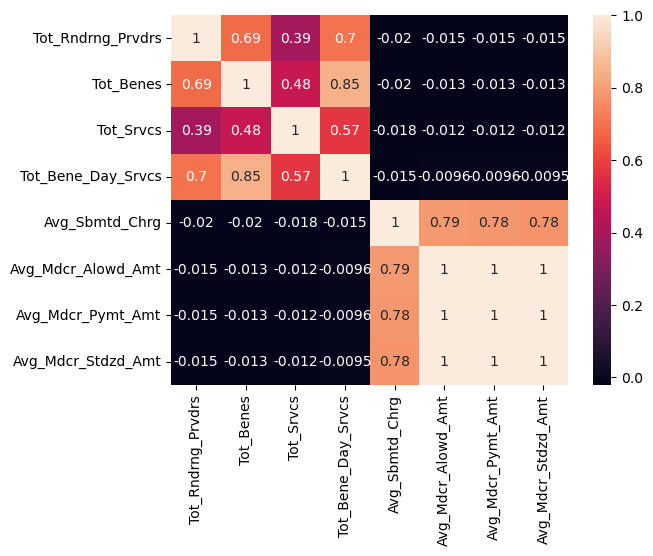

In [28]:
sns.heatmap(medicaredf[['Tot_Rndrng_Prvdrs', 'Tot_Benes', 'Tot_Srvcs',
       'Tot_Bene_Day_Srvcs', 'Avg_Sbmtd_Chrg', 'Avg_Mdcr_Alowd_Amt',
       'Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt']].corr(), annot = True)
# Multicollinearity between 'Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Stdzd_Amt'
# 'Avg_Mdcr_Pymt_Amt' is dependent Variable
# Drop 'Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Stdzd_Amt'

In [29]:
# Dummy Encoding
medicaredf=pd.get_dummies(medicaredf,columns=['Rndrng_Prvdr_Geo_Lvl', 'Rndrng_Prvdr_Geo_Desc',
                                              'HCPCS_Drug_Ind','Place_Of_Srvc'])

In [30]:
# Split Data into depedent variable(y) and Independent Variables (X's)
y=medicaredf.Avg_Mdcr_Pymt_Amt
X=medicaredf.drop(['Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Stdzd_Amt','Avg_Mdcr_Pymt_Amt'],axis=1)

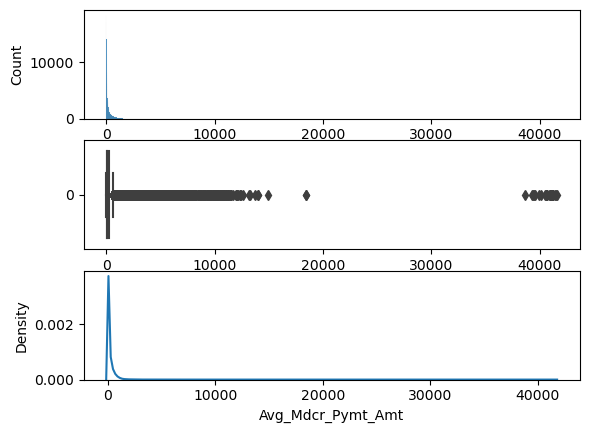

In [31]:
# Histogram, Boxplot and Density Curve of y
fig,ax=plt.subplots(3,1)
sns.histplot(y,ax=ax[0])
sns.boxplot(y,ax=ax[1],orient="h")
sns.kdeplot(y,ax=ax[2])
plt.show()

C:\Users\hp\Downloads\Anaconda3 nav\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Downloads\Anaconda3 nav\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\hp\Downloads\Anaconda3 nav\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


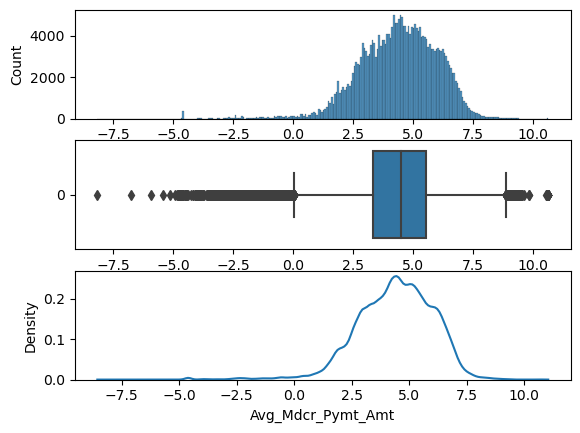

In [32]:
fig,ax=plt.subplots(3,1)
sns.histplot(np.log(y),ax=ax[0])
sns.boxplot(np.log(y),ax=ax[1],orient="h")
sns.kdeplot(np.log(y),ax=ax[2])
plt.show()

# Logarthmic Transformation due to very high positive skewness

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regmodel=LinearRegression().fit(X,y)

In [35]:
regmodel.score(X,y)

0.6327453953641551

In [36]:
regpredict=regmodel.predict(X)

In [37]:
np.sqrt(np.mean((y-regpredict)**2)) # RMSE

385.93030686213194

In [38]:
medicaredata=pd.read_csv("MUP_PHY_R23_P05_V10_D21_Geo.csv",low_memory=False)

In [39]:
pd.set_option("display.max_colwidth",None)
medicaredata.HCPCS_Desc.head(20)

0                                          Adm sarscov2 30mcg/0.3ml 1st
1                                          Adm sarscov2 30mcg/0.3ml 1st
2                                          Adm sarscov2 30mcg/0.3ml 2nd
3                                          Adm sarscov2 30mcg/0.3ml 2nd
4                                            Fee covid-19 vac 1 booster
5                                            Fee covid-19 vac 1 booster
6                                            Liver dis 10 assays w/nash
7                                                Fee covid-19 vac 1 res
8                                                Fee covid-19 vac 1 res
9     Test for detecting genes associated with prostate cancer in urine
10               Anesthesia for procedure on salivary gland with biopsy
11               Anesthesia for procedure on salivary gland with biopsy
12       Anesthesia for procedure to repair lip defect present at birth
13                                   Anesthesia for procedure on

In [40]:
medicaretxt=medicaredata.HCPCS_Desc

In [41]:
medicaretxt=medicaretxt.str.lower()

In [42]:
import re
def clean_txt(text):
    return ' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [43]:
medicaretxt=[str(clean_txt(x)) for x in medicaretxt]

In [44]:
import nltk
from nltk.corpus import stopwords

In [45]:
en_stopwords=set(stopwords.words("english"))

In [46]:
medicaretxt=pd.DataFrame(medicaretxt,columns=["HCPCS_Desc"])

In [47]:
medicare_words=medicaretxt.HCPCS_Desc.str.split()

In [48]:
from wordcloud import WordCloud

In [49]:
wordcloud=WordCloud(width=1000,height=500,stopwords=en_stopwords).generate(str(medicare_words))

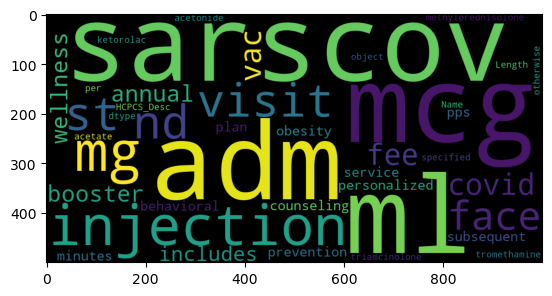

In [50]:
plt.imshow(wordcloud)
plt.show()

In [51]:
medicare_words=medicare_words.map(' '.join)

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf=TfidfVectorizer(max_features=300,stop_words="english",ngram_range=(2,2))

In [54]:
X_tfidf=tfidf.fit_transform(medicare_words)

In [55]:
X_tfidf=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.vocabulary_)

In [56]:
X_tfidf.shape

(271635, 300)

![image.png](attachment:c755a304-8ca1-457f-93ac-cdb47636435e.png)

In [57]:
X=pd.concat([X,X_tfidf],axis=1)# Concatenating other Independent Variables with NLP Variables

In [58]:
regmodel_nlp=LinearRegression().fit(X,y)

In [59]:
regmodel_nlp.score(X,y)

0.6423733130963691

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
treemodel=DecisionTreeRegressor(max_depth=8).fit(X,y)

In [62]:
treemodel.score(X,y)

0.8894696591503579

In [63]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

  2%|█▉                                                                              | 1/42 [01:45<1:12:14, 105.73s/it]